In [1]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import sys

sys.path.append('..')

adult_train = pd.read_csv('AdultDateset/adult_train.csv')
adult_test = pd.read_csv('AdultDateset/adult_test.csv')
adult_train.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
from sklearn.preprocessing import LabelEncoder

for i in ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
          'native-country', 'label']:
    le = LabelEncoder()
    adult_train[i] = le.fit_transform(adult_train[i])
    adult_test[i] = le.fit_transform(adult_test[i])

In [3]:
from sklearn.preprocessing import MinMaxScaler

train = adult_train.iloc[:, :-1]
train = MinMaxScaler().fit_transform(train)
labels_train = adult_train['label']
test = adult_test.iloc[:, :-1]
test = MinMaxScaler().fit_transform(test)
labels_test = adult_test['label']

In [4]:
categorical_features = np.argwhere(
    np.array([len(set(adult_train.iloc[:, x])) for x in range(adult_train.shape[1] - 1)]) <= 10).flatten()
categorical_features

array([1, 5, 7, 8, 9], dtype=int64)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout
from keras.utils import to_categorical

model = RandomForestClassifier(random_state=2022)
# model = AdaBoostClassifier(random_state=2022)
# model = GradientBoostingClassifier(random_state=2022)
# labels_train2 = to_categorical(labels_train, 2)
# labels_test2 = to_categorical(labels_test, 2)
# model = Sequential()
# model.add(Dense(32, activation='relu', input_dim=30))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.fit(train, labels_train2, batch_size=32, epochs=50, validation_data=(test, labels_test2))
model.fit(train, labels_train)

Using TensorFlow backend.


RandomForestClassifier(random_state=2022)

In [6]:
pred_origin = model.predict_proba(test)
pred_origin = np.argmax(pred_origin, axis=1)
pred_origin

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [7]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=adult_train.columns[:-1].values,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

0.11039892620644001
0.9187159496008425
[('capital-gain > 0.00', 5.236937356618824), ('capital-loss <= 0.00', -1.0153579689644454), ('education-num <= 0.53', -0.9515653380445246), ('relationship=0', 0.6763756993025541), ('occupation <= 0.21', 0.561571630102025), ('0.60 < education <= 0.73', -0.49455430546278056), ('marital-status=0', 0.355714122376562), ('0.27 < age <= 0.42', 0.3478869076838035), ('hours-per-week > 0.45', -0.3397836122741266), ('fnlwgt > 0.15', -0.3147668779107872), ('race=1', -0.2940816026266719), ('sex=1', 0.2632043473671505), ('workclass=0', 0.2531201221162845), ('native-country <= 0.95', -0.18700895860949004)]
[-0.18700895860949004, 0.2531201221162845, 0.2632043473671505, -0.2940816026266719, -0.3147668779107872, -0.3397836122741266, 0.3478869076838035, 0.355714122376562, -0.49455430546278056, 0.561571630102025, 0.6763756993025541, -0.9515653380445246, -1.0153579689644454, 5.236937356618824]
['native-country <= 0.95', 'workclass=0', 'sex=1', 'race=1', 'fnlwgt > 0.15

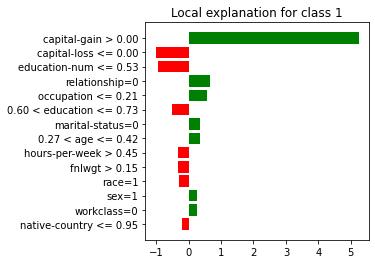

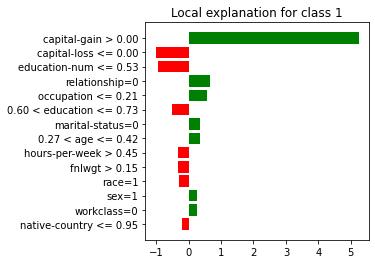

In [8]:
exp = explainer.explain_instance(test[25], model.predict_proba, num_features=14,
                                 labels=(0, 1), num_samples=50000
                                 # , model_regressor='ensemble'
                                 )
print(exp.local_pred[0])
print(exp.local_pred[1])
exp.as_pyplot_figure(label=1)

In [9]:
import tqdm as td

pred_lime = []
for i in td.tqdm(test):
    exp = explainer.explain_instance(i, model.predict_proba, num_features=14, labels=(0, 1)
                                     , num_samples=50000
                                     # , model_regressor='ensemble'
                                     )
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0], exp.local_pred[1]])

  0%|          | 0/16281 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime[:5]

In [ ]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, pred_origin, digits=4))

In [ ]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))

In [ ]:

print('\nClassification Report:\n', classification_report(pred_origin, pred_lime, digits=4))
